In [ ]:
Figure 6 is a sensitivity analysis across various model parameter variations

# TODO: remove any non-unique parameters, and include the noise parameter (this noise parameter seems to be the issue)

In [1]:
include(joinpath("..","src","setup.jl"))

┌ Info: Recompiling stale cache file /Users/davidlittle/.julia/compiled/v1.0/RCall/8GFyb.ji for RCall [6f49c342-dc21-5d91-9882-a32aef131414]
└ @ Base loading.jl:1190
┌ Warning: Package RCall does not have AxisArrays in its dependencies:
│ - If you have RCall checked out for development and have
│   added AxisArrays as a dependency but haven't updated your primary
│   environment's manifest file, try `Pkg.resolve()`.
│ - Otherwise you may need to report an issue with RCall
│ Loading AxisArrays into RCall from project dependency, future warnings for RCall are suppressed.
└ @ nothing nothing:840
┌ Info: Recompiling stale cache file /Users/davidlittle/.julia/compiled/v1.0/DataFramesMeta/2xRTO.ji for DataFramesMeta [1313f7d8-7da2-5740-9ea0-a2ca25f37964]
└ @ Base loading.jl:1190


┌ Info: Recompiling stale cache file /Users/davidlittle/.julia/compiled/v1.0/Gadfly/DvECm.ji for Gadfly [c91e804a-d5a3-530f-b6f0-dfbca275c004]
└ @ Base loading.jl:1190
┌ Info: Loading Cairo backend into Compose.jl
└ @ Compose /Users/davidlittle/.julia/packages/Compose/wlPCt/src/Compose.jl:164
┌ Info: Loading DataFrames support into Gadfly.jl
└ @ Gadfly /Users/davidlittle/.julia/packages/Gadfly/ew1SM/src/mapping.jl:228


RObject{VecSxp}
$rcalljl_options
$rcalljl_options$height
[1] 360

$rcalljl_options$width
[1] 432




In [2]:
datadir = joinpath("..","data","count_lengths","run_2018-12-06")

"../data/count_lengths/run_2018-12-06"

In [3]:
noise_datadir = joinpath(datadir,"..","run_2018-12-14")

"../data/count_lengths/run_2018-12-06/../run_2018-12-14"

In [4]:
W_datadir = joinpath(datadir,"..","run_2019-01-02")

"../data/count_lengths/run_2018-12-06/../run_2019-01-02"

In [5]:
fields = [:f_c_a,:f_c_m,:f_c_σ,:s_c_a,:s_c_m,:s_c_σ,:t_c_a,:t_c_m,:t_c_σ,
          :f_τ_a,:f_τ_m,:s_τ_a,:s_τ_m,:t_τ_a,:t_τ_m,
          :f_W_m_σ,:s_W_m_σ,:t_W_m_σ_t,:t_W_m_σ_ϕ,:t_W_m_σ_N];

In [67]:
params = load_params(joinpath(datadir,"params.jld2"))
params[:pindex] = 1:size(params,1)
settings = joinpath("..","src","settings.toml")

results = []
for_results_in(joinpath(datadir,"data")) do entry
  push!(results,DataFrame(length=entry["lengths"],
                          percepts=entry["percepts"].+1, # after +1, indicates the number of streams reported, 1 or 2
                          created=entry["created"],
                          pindex=entry["pindex"])) # the parameter index (pindex = N correspondes to row N of `params`)
end
df = vcat(results...);
head(df)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:08


,length,percepts,created,pindex
,Float64,Int64,DateTime,Int64
1,0.3,1,2018-12-06T23:52:05.717,1
2,0.9,2,2018-12-06T23:52:05.717,1
3,4.4,1,2018-12-06T23:52:05.717,1
4,0.6,2,2018-12-06T23:52:05.717,1
5,3.0,1,2018-12-06T23:52:05.717,1
6,0.3,2,2018-12-06T23:52:05.717,1


In [68]:
# turns out there are some non-unique parameter values with this; remove those (in the future do it before running the simulation)
paramssel = unique!(params,[fields;:Δf])
size(paramssel,1)

1575

In [69]:
size(df)

(448632, 4)

In [70]:
dfsel = @where(df,in.(:pindex,Ref(paramssel.pindex)));
size(dfsel)

(348782, 4)

In [71]:
paramssel[:old_pindex] = paramssel.pindex;
dfsel[:old_pindex] = dfsel.pindex;

In [72]:
paramssel[:pindex] = 1:size(paramssel,1)
for row in 1:size(dfsel,1)
    i = findfirst(isequal(dfsel.old_pindex[row]),paramssel.old_pindex)
    if i isa Nothing
        error("Can't find old_pindex $(dfsel.old_pindex[row])")
    end
    dfsel.pindex[row] = paramssel.pindex[i]
end
head(dfsel)

,length,percepts,created,pindex,old_pindex
,Float64,Int64,DateTime,Int64,Int64
1,0.3,1,2018-12-06T23:52:05.717,1,1
2,0.9,2,2018-12-06T23:52:05.717,1,1
3,4.4,1,2018-12-06T23:52:05.717,1,1
4,0.6,2,2018-12-06T23:52:05.717,1,1
5,3.0,1,2018-12-06T23:52:05.717,1,1
6,0.3,2,2018-12-06T23:52:05.717,1,1


In [73]:
delete!(dfsel,:old_pindex);
delete!(paramssel,:old_pindex);

In [74]:
print(maximum(paramssel.pindex))
size(paramssel)

1575

(1575, 36)

we've gotten rid of the redundant parameters, now load the missing noise variations

In [75]:
params = load_params(joinpath(noise_datadir,"params.jld2"))
params[:pindex] = 1:size(params,1)

results = []
for_results_in(joinpath(noise_datadir,"data")) do entry
  push!(results,DataFrame(length=entry["lengths"],
                          percepts=entry["percepts"].+1, # after +1, indicates the number of streams reported, 1 or 2
                          created=entry["created"],
                          pindex=entry["pindex"])) # the parameter index (pindex = N correspondes to row N of `params`)
end
df = vcat(results...);
head(df)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:03


,length,percepts,created,pindex
,Float64,Int64,DateTime,Int64
1,5.6,1,2018-12-17T14:16:27.018,1
2,0.6,2,2018-12-17T14:16:27.018,1
3,3.0,1,2018-12-17T14:16:27.018,1
4,0.3,2,2018-12-17T14:16:27.018,1
5,0.9,1,2018-12-17T14:16:27.018,1
6,0.9,2,2018-12-17T14:16:27.018,1


In [76]:
maximum(params.pindex)

675

In [77]:
size(params)

(675, 36)

In [78]:
df.pindex .+= maximum(dfsel.pindex);
params.pindex .+= maximum(paramssel.pindex);

In [79]:
df = vcat(dfsel,df);
params = vcat(paramssel,params)

,f_W_m_σ,f_c_m,t_c_a,t_c_m,f,t_W_m_c,t_c_x,f_c_x,t_W_m_σ_t,s_τ_σ,f_c_a,f_c_σ,s_c_m,f_τ_a,s_c_σ,Δt,s_τ_m,s_c_x,t_W_m_σ_ϕ,t_τ_a,s_c_a,t_τ_m,t_c_σ,t_τ_x,s_W_m_c,s_τ_a,f_W_m_c,t_τ_σ,f_τ_σ,f_τ_x,Δf,t_W_m_σ_N,f_τ_m,s_τ_x,s_W_m_σ,pindex
,Float64,Float64,Float64,Float64,Quantity…,Float64,Float64,Float64,Float64,Quantity…,Float64,Float64,Float64,Quantity…,Float64,Quantity…,Quantity…,Float64,Float64,Quantity…,Float64,Quantity…,Float64,Quantity…,Float64,Quantity…,Float64,Quantity…,Quantity…,Quantity…,Int64,Float64,Quantity…,Quantity…,Float64,Int64
1,5.6,0.0,0.0,0.0,500 Hz,6.0,3.0,3.0,7.0,500 ms,0.0,0.2,0.0,1.0 s,0.0,120 ms,0.35 s,3.0,7.0,3.0 s,0.0,0.35 s,0.0,500 ms,6.0,3.0 s,6.0,500 ms,500 ms,500 ms,3,3.0,0.35 s,500 ms,15.0,1
2,5.6,5.0,0.0,0.0,500 Hz,6.0,3.0,3.0,7.0,500 ms,0.0,0.2,0.0,1.0 s,0.0,120 ms,0.35 s,3.0,7.0,3.0 s,0.0,0.35 s,0.0,500 ms,6.0,3.0 s,6.0,500 ms,500 ms,500 ms,3,3.0,0.35 s,500 ms,15.0,2
3,5.6,63.0,0.0,0.0,500 Hz,6.0,3.0,3.0,7.0,500 ms,0.0,0.2,0.0,1.0 s,0.0,120 ms,0.35 s,3.0,7.0,3.0 s,0.0,0.35 s,0.0,500 ms,6.0,3.0 s,6.0,500 ms,500 ms,500 ms,3,3.0,0.35 s,500 ms,15.0,3
4,5.6,790.0,0.0,0.0,500 Hz,6.0,3.0,3.0,7.0,500 ms,0.0,0.2,0.0,1.0 s,0.0,120 ms,0.35 s,3.0,7.0,3.0 s,0.0,0.35 s,0.0,500 ms,6.0,3.0 s,6.0,500 ms,500 ms,500 ms,3,3.0,0.35 s,500 ms,15.0,4
5,5.6,10000.0,0.0,0.0,500 Hz,6.0,3.0,3.0,7.0,500 ms,0.0,0.2,0.0,1.0 s,0.0,120 ms,0.35 s,3.0,7.0,3.0 s,0.0,0.35 s,0.0,500 ms,6.0,3.0 s,6.0,500 ms,500 ms,500 ms,3,3.0,0.35 s,500 ms,15.0,5
6,5.6,0.0,0.0,0.0,500 Hz,6.0,3.0,3.0,7.0,500 ms,5.0,0.2,0.0,1.0 s,0.0,120 ms,0.35 s,3.0,7.0,3.0 s,0.0,0.35 s,0.0,500 ms,6.0,3.0 s,6.0,500 ms,500 ms,500 ms,3,3.0,0.35 s,500 ms,15.0,6
7,5.6,5.0,0.0,0.0,500 Hz,6.0,3.0,3.0,7.0,500 ms,5.0,0.2,0.0,1.0 s,0.0,120 ms,0.35 s,3.0,7.0,3.0 s,0.0,0.35 s,0.0,500 ms,6.0,3.0 s,6.0,500 ms,500 ms,500 ms,3,3.0,0.35 s,500 ms,15.0,7
8,5.6,63.0,0.0,0.0,500 Hz,6.0,3.0,3.0,7.0,500 ms,5.0,0.2,0.0,1.0 s,0.0,120 ms,0.35 s,3.0,7.0,3.0 s,0.0,0.35 s,0.0,500 ms,6.0,3.0 s,6.0,500 ms,500 ms,500 ms,3,3.0,0.35 s,500 ms,15.0,8
9,5.6,790.0,0.0,0.0,500 Hz,6.0,3.0,3.0,7.0,500 ms,5.0,0.2,0.0,1.0 s,0.0,120 ms,0.35 s,3.0,7.0,3.0 s,0.0,0.35 s,0.0,500 ms,6.0,3.0 s,6.0,500 ms,500 ms,500 ms,3,3.0,0.35 s,500 ms,15.0,9


In [80]:
size(params)

(2250, 36)

In [81]:
paramsold = params
dfold = df;

In [100]:
params = load_params(joinpath(W_datadir,"params.jld2"))
params[:pindex] = 1:size(params,1)

results = []

for_results_in(joinpath(W_datadir,"data")) do entry
  push!(results,DataFrame(length=entry["lengths"],
                          percepts=entry["percepts"].+1, # after +1, indicates the number of streams reported, 1 or 2
                          created=entry["created"],
                          pindex=entry["pindex"])) # the parameter index (pindex = N correspondes to row N of `params`)
end
df = vcat(results...);
head(df)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:03


,length,percepts,created,pindex
,Float64,Int64,DateTime,Int64
1,1.2,2,2019-01-03T02:30:09.303,1
2,2.0,1,2019-01-03T02:30:09.303,1
3,0.4,2,2019-01-03T02:30:09.303,1
4,3.3,1,2019-01-03T02:30:09.303,1
5,0.5,2,2019-01-03T02:30:09.303,1
6,10.2,1,2019-01-03T02:30:09.303,1


In [101]:
maximum(params.pindex)

750

In [103]:
size(params)

(750, 36)

In [104]:
df.pindex .+= maximum(dfold.pindex);
params.pindex .+= maximum(paramsold.pindex);

In [105]:
df = vcat(dfold,df);
params = vcat(paramsold,params)

,f_W_m_σ,f_c_m,t_c_a,t_c_m,f,t_W_m_c,t_c_x,f_c_x,t_W_m_σ_t,s_τ_σ,f_c_a,f_c_σ,s_c_m,f_τ_a,s_c_σ,Δt,s_τ_m,s_c_x,t_W_m_σ_ϕ,t_τ_a,s_c_a,t_τ_m,t_c_σ,t_τ_x,s_W_m_c,s_τ_a,f_W_m_c,t_τ_σ,f_τ_σ,f_τ_x,Δf,t_W_m_σ_N,f_τ_m,s_τ_x,s_W_m_σ,pindex
,Float64,Float64,Float64,Float64,Quantity…,Float64,Float64,Float64,Float64,Quantity…,Float64,Float64,Float64,Quantity…,Float64,Quantity…,Quantity…,Float64,Float64,Quantity…,Float64,Quantity…,Float64,Quantity…,Float64,Quantity…,Float64,Quantity…,Quantity…,Quantity…,Int64,Float64,Quantity…,Quantity…,Float64,Int64
1,5.6,0.0,0.0,0.0,500 Hz,6.0,3.0,3.0,7.0,500 ms,0.0,0.2,0.0,1.0 s,0.0,120 ms,0.35 s,3.0,7.0,3.0 s,0.0,0.35 s,0.0,500 ms,6.0,3.0 s,6.0,500 ms,500 ms,500 ms,3,3.0,0.35 s,500 ms,15.0,1
2,5.6,5.0,0.0,0.0,500 Hz,6.0,3.0,3.0,7.0,500 ms,0.0,0.2,0.0,1.0 s,0.0,120 ms,0.35 s,3.0,7.0,3.0 s,0.0,0.35 s,0.0,500 ms,6.0,3.0 s,6.0,500 ms,500 ms,500 ms,3,3.0,0.35 s,500 ms,15.0,2
3,5.6,63.0,0.0,0.0,500 Hz,6.0,3.0,3.0,7.0,500 ms,0.0,0.2,0.0,1.0 s,0.0,120 ms,0.35 s,3.0,7.0,3.0 s,0.0,0.35 s,0.0,500 ms,6.0,3.0 s,6.0,500 ms,500 ms,500 ms,3,3.0,0.35 s,500 ms,15.0,3
4,5.6,790.0,0.0,0.0,500 Hz,6.0,3.0,3.0,7.0,500 ms,0.0,0.2,0.0,1.0 s,0.0,120 ms,0.35 s,3.0,7.0,3.0 s,0.0,0.35 s,0.0,500 ms,6.0,3.0 s,6.0,500 ms,500 ms,500 ms,3,3.0,0.35 s,500 ms,15.0,4
5,5.6,10000.0,0.0,0.0,500 Hz,6.0,3.0,3.0,7.0,500 ms,0.0,0.2,0.0,1.0 s,0.0,120 ms,0.35 s,3.0,7.0,3.0 s,0.0,0.35 s,0.0,500 ms,6.0,3.0 s,6.0,500 ms,500 ms,500 ms,3,3.0,0.35 s,500 ms,15.0,5
6,5.6,0.0,0.0,0.0,500 Hz,6.0,3.0,3.0,7.0,500 ms,5.0,0.2,0.0,1.0 s,0.0,120 ms,0.35 s,3.0,7.0,3.0 s,0.0,0.35 s,0.0,500 ms,6.0,3.0 s,6.0,500 ms,500 ms,500 ms,3,3.0,0.35 s,500 ms,15.0,6
7,5.6,5.0,0.0,0.0,500 Hz,6.0,3.0,3.0,7.0,500 ms,5.0,0.2,0.0,1.0 s,0.0,120 ms,0.35 s,3.0,7.0,3.0 s,0.0,0.35 s,0.0,500 ms,6.0,3.0 s,6.0,500 ms,500 ms,500 ms,3,3.0,0.35 s,500 ms,15.0,7
8,5.6,63.0,0.0,0.0,500 Hz,6.0,3.0,3.0,7.0,500 ms,5.0,0.2,0.0,1.0 s,0.0,120 ms,0.35 s,3.0,7.0,3.0 s,0.0,0.35 s,0.0,500 ms,6.0,3.0 s,6.0,500 ms,500 ms,500 ms,3,3.0,0.35 s,500 ms,15.0,8
9,5.6,790.0,0.0,0.0,500 Hz,6.0,3.0,3.0,7.0,500 ms,5.0,0.2,0.0,1.0 s,0.0,120 ms,0.35 s,3.0,7.0,3.0 s,0.0,0.35 s,0.0,500 ms,6.0,3.0 s,6.0,500 ms,500 ms,500 ms,3,3.0,0.35 s,500 ms,15.0,9


In [106]:
size(params)

(3000, 36)

In [107]:
size(unique(df.pindex))

(3000,)

In [108]:
progress = Progress(length(groupby(params,fields)))
herr = human_error(resample=10_000,N=N_for_pressnitzer_hupe_2006)
df_summary = by(params,fields) do row
    ## next!(progress)
    err = model_error(df,params;(k => row[1,k] for k in fields)...)
    DataFrame(stream_error = err.stream,length_error = err.lengths,eratio = error_ratio(err,herr))
end
head(df_summary)

,f_c_a,f_c_m,f_c_σ,s_c_a,s_c_m,s_c_σ,t_c_a,t_c_m,t_c_σ,f_τ_a,f_τ_m,s_τ_a,s_τ_m,t_τ_a,t_τ_m,f_W_m_σ,s_W_m_σ,t_W_m_σ_t,t_W_m_σ_ϕ,t_W_m_σ_N,stream_error,length_error,eratio
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Quantity…,Quantity…,Quantity…,Quantity…,Quantity…,Quantity…,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,1.0 s,0.35 s,3.0 s,0.35 s,3.0 s,0.35 s,5.6,15.0,7.0,7.0,3.0,0.245575,0.447945,2.02824
2,0.0,5.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,1.0 s,0.35 s,3.0 s,0.35 s,3.0 s,0.35 s,5.6,15.0,7.0,7.0,3.0,0.262555,0.658082,2.58721
3,0.0,63.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,1.0 s,0.35 s,3.0 s,0.35 s,3.0 s,0.35 s,5.6,15.0,7.0,7.0,3.0,0.274547,1.0,3.43425
4,0.0,790.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,1.0 s,0.35 s,3.0 s,0.35 s,3.0 s,0.35 s,5.6,15.0,7.0,7.0,3.0,0.275776,1.0,3.43916
5,0.0,10000.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,1.0 s,0.35 s,3.0 s,0.35 s,3.0 s,0.35 s,5.6,15.0,7.0,7.0,3.0,0.275648,1.0,3.43865
6,5.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,1.0 s,0.35 s,3.0 s,0.35 s,3.0 s,0.35 s,5.6,15.0,7.0,7.0,3.0,0.246174,0.218358,1.49405


In [119]:
dfplot = @linq df_summary |>
    rename_levels_for([:stream_error,:length_error,:eratio],suffixes=[:c_a,:c_m,:τ_a,:τ_m,:c_σ,:W_m_σ,:W_m_σ_t,:W_m_σ_ϕ,:W_m_σ_N]) |>
    transform(a = packaxes(:c_a), m = packaxes(:c_m), rand = randn(length(:c_a))) |>
    transform(eratio_str = fmt.("01.2f",:eratio))
              
head(dfplot)

,c_a,c_m,τ_a,τ_m,c_σ,W_m_σ,W_m_σ_t,W_m_σ_ϕ,W_m_σ_N,level,stream_error,length_error,eratio,a,m,rand,eratio_str
,Float64,Float64,Quantity…,Quantity…,Float64,Float64,Float64,Float64,Float64,String,Float64,Float64,Float64,Float64,Float64,Float64,String
1,0.0,0.0,1.0 s,0.35 s,0.2,5.6,NaN,NaN,NaN,Peripheral,0.245575,0.447945,2.02824,0.0,0.0,0.64086,2.03
2,0.0,5.0,1.0 s,0.35 s,0.2,5.6,NaN,NaN,NaN,Peripheral,0.262555,0.658082,2.58721,0.0,1.5,1.47944,2.59
3,0.0,63.0,1.0 s,0.35 s,0.2,5.6,NaN,NaN,NaN,Peripheral,0.274547,1.0,3.43425,0.0,2.5,-0.861415,3.43
4,0.0,790.0,1.0 s,0.35 s,0.2,5.6,NaN,NaN,NaN,Peripheral,0.275776,1.0,3.43916,0.0,3.5,0.831835,3.44
5,0.0,10000.0,1.0 s,0.35 s,0.2,5.6,NaN,NaN,NaN,Peripheral,0.275648,1.0,3.43865,0.0,5.0,0.353377,3.44
6,5.0,0.0,1.0 s,0.35 s,0.2,5.6,NaN,NaN,NaN,Peripheral,0.246174,0.218358,1.49405,1.5,0.0,-0.410877,1.49


In [165]:
dfplot[:variation] = "unknown"
dfplot[:varvalue] = NaN
allsel = []
sel = findall(!isequal(3.0s),dfplot.τ_a)
dfplot[sel,:variation] = "τ_a"
dfplot[sel,:varvalue] = ustrip.(uconvert.(s,dfplot[sel,:τ_a]))
@assert length(sel) .== 225
append!(allsel,sel)

sel = findall(!isequal(350ms),dfplot.τ_m)
dfplot[sel,:variation] = "τ_m"
dfplot[sel,:varvalue] = ustrip.(uconvert.(s,dfplot[sel,:τ_m]))
@assert length(sel) .== 225
append!(allsel,sel)

sel = findall(!isequal(0.2),dfplot.c_σ)
dfplot[sel,:variation] = "c_σ"
dfplot[sel,:varvalue] = dfplot[sel,:c_σ]
@assert length(sel) .== 225
append!(allsel,sel)

sel = findall((dfplot.W_m_σ .!= 5.6) .& (dfplot.level .== "Peripheral") .& .!isnan.(dfplot.W_m_σ))
@assert length(sel) .== 50
dfplot[sel,:variation] = "P: W_m_σ"
dfplot[sel,:varvalue] = dfplot[sel,:W_m_σ]

sel = findall((dfplot.W_m_σ .!= 15) .& (dfplot.level .== "Cortical") .& .!isnan.(dfplot.W_m_σ))
@assert length(sel) .== 50
dfplot[sel,:variation] = "C: W_m_σ"
dfplot[sel,:varvalue] = dfplot[sel,:W_m_σ]

sel = findall((dfplot.W_m_σ_t .!= 7.0) .& (dfplot.level .== "Object") .& .!isnan.(dfplot.W_m_σ_t))
@assert length(sel) .== 50
dfplot[sel,:variation] = "O: W_m_σ (t)"
dfplot[sel,:varvalue] = dfplot[sel,:W_m_σ_t]

sel = findall((dfplot.W_m_σ_ϕ .!= 7.0) .& (dfplot.level .== "Object") .& .!isnan.(dfplot.W_m_σ_ϕ))
@assert length(sel) .== 50
dfplot[sel,:variation] = "O: W_m_σ (ϕ)"
dfplot[sel,:varvalue] = dfplot[sel,:W_m_σ_ϕ]

sel = findall((dfplot.W_m_σ_N .!= 3.0) .& (dfplot.level .== "Object") .& .!isnan.(dfplot.W_m_σ_N))
@assert length(sel) .== 50
dfplot[sel,:variation] = "O: W_m_σ (N)"
dfplot[sel,:varvalue] = dfplot[sel,:W_m_σ_N];

In [122]:
sel = findall((dfplot.W_m_σ .!= 5.6) .& (dfplot.level .!= "Object"))
length(sel)

350

In [166]:
dfsumplot = by(dfplot,[:variation,:varvalue,:level]) do df
    DataFrame(eratio = mean(df.eratio),elower = quantile(df.eratio,0.025),eupper = quantile(df.eratio,0.975))
end;

In [167]:
uniqueinds(x) = indexin(x,unique(x))
dfsumplot.xval = 3.2.*Float64.(uniqueinds(dfsumplot.variation))
for g in groupby(dfsumplot,:variation)
    sel = findall(isequal(first(g.variation)),dfsumplot.variation)
    dfsumplot[sel,:xval] = dfsumplot[sel,:xval] .+ (0.9.*uniqueinds(g.varvalue))
end
dfsumplot.xval .+= 0.3.*uniqueinds(dfsumplot.level)
dfsumplot.xval .-= 2.5

dfsumplot

,variation,varvalue,level,eratio,elower,eupper,xval
,String,Float64,String,Float64,Float64,Float64,Float64
1,τ_a,1.0,Peripheral,3.12829,1.3253,3.71655,1.9
2,τ_a,5.0,Peripheral,2.9358,1.49007,3.69555,2.8
3,τ_a,10.0,Peripheral,2.94163,1.44026,3.69801,3.7
4,τ_m,0.15,Peripheral,2.89667,1.18976,3.69555,5.1
5,τ_m,0.5,Peripheral,3.09169,1.34475,3.87682,6.0
6,τ_m,1.0,Peripheral,3.10893,1.23793,3.85805,6.9
7,unknown,NaN,Peripheral,3.06427,1.45832,3.71366,8.3
8,τ_a,1.0,Cortical,2.14664,1.01788,3.69219,2.2
9,τ_a,5.0,Cortical,2.00038,0.972705,3.69555,3.1


In [168]:
p = plot(dfsumplot,x=:xval,y=:eratio,ymin=:elower,ymax=:eupper,group=:varvalue,color=:level,Geom.point,Geom.errorbar)
draw(SVG(7inch,3inch),p)
draw(PDF(joinpath(plotdir,"fig6.pdf"),7inch,3inch),p)

┌ Warning: The following aesthetics are mapped, but not used by any geometry:
│ group
└ @ Gadfly /Users/davidlittle/.julia/packages/Gadfly/ew1SM/src/Gadfly.jl:484
┌ Warning: For svg transparent colors, use either e.g. fill(RGBA(r,g,b,a)) or fillopacity(a), but not both.
└ @ Compose /Users/davidlittle/.julia/packages/Compose/wlPCt/src/svg.jl:1271


┌ Warning: The following aesthetics are mapped, but not used by any geometry:
│ group
└ @ Gadfly /Users/davidlittle/.julia/packages/Gadfly/ew1SM/src/Gadfly.jl:484


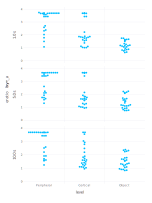

In [30]:
draw(SVG(6inch,8inch),plot(dfplot[dfplot.τ_a .!= 3.0s,:],x=:level,y=:eratio,ygroup=:τ_a,
        Geom.subplot_grid(Geom.beeswarm)))

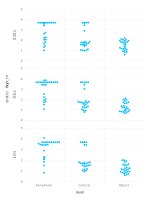

In [31]:
draw(SVG(6inch,8inch),plot(dfplot[dfplot.τ_m .!= 350ms,:],x=:level,y=:eratio,ygroup=:τ_m,Geom.subplot_grid(Geom.beeswarm)))

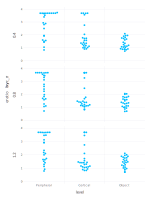

In [32]:
draw(SVG(6inch,8inch),plot(dfplot[dfplot.c_σ .!= 0.2,:],x=:level,y=:eratio,ygroup=:c_σ,Geom.subplot_grid(Geom.beeswarm)))

In [ ]:
# TODO: visually verify the overall distribution for the inhibition parameters